# Pytorch AutoGrad_W1D2 Tutorial1

使用Pytorch构建网络以及训练的常用模板:

In [1]:
# Imports
import torch
import numpy as np
from torch import nn
from math import pi
import matplotlib.pyplot as plt

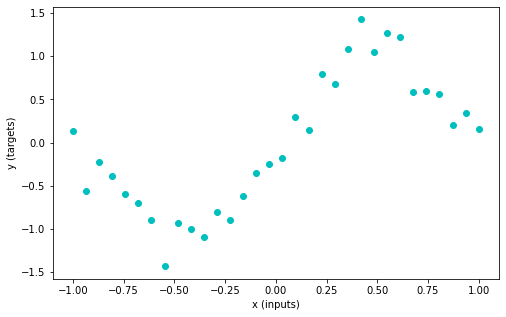

In [2]:
# Generate the sample dataset
n_samples = 32
inputs = torch.linspace(-1.0, 1.0, n_samples).reshape(n_samples, 1)
noise = torch.randn(n_samples, 1) / 4
targets = torch.sin(pi * inputs) + noise
plt.figure(figsize=(8, 5))
plt.scatter(inputs, targets, c='c')
plt.xlabel('x (inputs)')
plt.ylabel('y (targets)')
plt.show()

**Important Notes:**
* Learnable parameters (i.e. `requires_grad` tensors) are "contagious". Let's look at a simple example: `Y = W @ X`, where `X` is the feature tensors and `W` is the weight tensor (learnable parameters, `requires_grad`), the newly generated output tensor `Y` will be also `requires_grad`. So any operation that is applied to `Y` will be part of the computational graph. Therefore, if we need to plot or store a tensor that is `requires_grad`, we must first `.detach()` it from the graph by calling the `.detach()` method on that tensor.

* `.backward()` accumulates gradients in the leaf nodes (i.e., the input nodes to the node of interest). We can call `.zero_grad()` on the loss or optimizer to zero out all `.grad` attributes (see [autograd.backward](https://pytorch.org/docs/stable/autograd.html#torch.autograd.backward) for more information).

* Recall that in python we can access variables and associated methods with `.method_name`. You can use the command `dir(my_object)` to observe all variables and associated methods to your object, e.g., `dir(simple_graph.w)`.

In [3]:
def ex3_plot(model, x, y, ep, lss):
  """
  Plot training loss

  Args:
    model: nn.module
      Model implementing regression
    x: np.ndarray
      Training Data
    y: np.ndarray
      Targets
    ep: int
      Number of epochs
    lss: function
      Loss function

  Returns:
    Nothing
  """
  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
  ax1.set_title("Regression")
  ax1.plot(x, model(x).detach().numpy(), color='r', label='prediction') #Here we use ".detach" on model(x)
  ax1.scatter(x, y, c='c', label='targets')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y')
  ax1.legend()

  ax2.set_title("Training loss")
  ax2.plot(np.linspace(1, epochs, epochs), losses, color='y')
  ax2.set_xlabel("Epoch")
  ax2.set_ylabel("MSE")

  plt.show()

In [4]:
class WideNet(nn.Module):
  """
   A Wide neural network with a single hidden layer
   Structure is as follows:
   nn.Sequential(
        nn.Linear(1, n_cells) + nn.Tanh(), # Fully connected layer with tanh activation
        nn.Linear(n_cells, 1) # Final fully connected layer
    )
  """

  def __init__(self):
    """
    Initializing the parameters of WideNet

    Args:
      None

    Returns:
      Nothing
    """
    n_cells = 512
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(1, n_cells),
        nn.Tanh(),
        nn.Linear(n_cells, 1),
    )

  def forward(self, x):
    """
    Forward pass of WideNet

    Args:
      x: torch.Tensor
        2D tensor of features

    Returns:
      Torch tensor of model predictions
    """
    return self.layers(x)

In [5]:
# Creating an instance

wide_net = WideNet()
print(wide_net)

WideNet(
  (layers): Sequential(
    (0): Linear(in_features=1, out_features=512, bias=True)
    (1): Tanh()
    (2): Linear(in_features=512, out_features=1, bias=True)
  )
)


In [6]:
# Create a mse loss function
loss_function = nn.MSELoss()

# Stochstic Gradient Descent optimizer (you will learn about momentum soon)
lr = 0.003  # Learning rate
sgd_optimizer = torch.optim.SGD(wide_net.parameters(), lr=lr, momentum=0.9)

In [7]:
def train(features, labels, model, loss_fun, optimizer, n_epochs):
  """
  Training function
  Args:
    features: torch.Tensor
      Features (input) with shape torch.Size([n_samples, 1])
    labels: torch.Tensor
      Labels (targets) with shape torch.Size([n_samples, 1])
    model: torch nn.Module
      The neural network
    loss_fun: function
      Loss function
    optimizer: function
      Optimizer
    n_epochs: int
      Number of training iterations
  Returns:
    loss_record: list
      Record (evolution) of training losses
  """
  loss_record = []  # Keeping recods of loss

  for i in range(n_epochs):
    optimizer.zero_grad()  # Set gradients to 0
    predictions = model(features)  # Compute model prediction (output)
    loss = loss_fun(predictions, labels)  # Compute the loss
    loss.backward()  # Compute gradients (backward pass)
    optimizer.step()  # Update parameters (optimizer takes a step)

    loss_record.append(loss.item())
  return loss_record


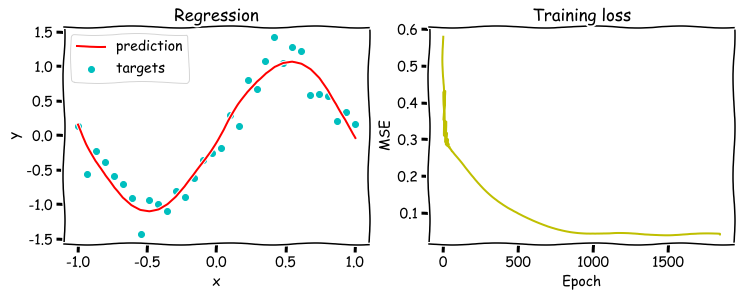

In [8]:
epochs = 1847 # Cauchy, Exercices d'analyse et de physique mathematique (1847)
## Uncomment to run
losses = train(inputs, targets, wide_net, loss_function, sgd_optimizer, epochs)
with plt.xkcd():
  ex3_plot(wide_net, inputs, targets, epochs, losses)

In [31]:
# dir(wide_net(inputs))